In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
import pyodbc 
server = 'SRVDWHBI' 
database = 'STAGING' 
username = 'userssis' 
password = 'Pa$$w0rd' 
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


cursor = conn.cursor()
datasetinicial = pd.read_sql_query("""SELECT * FROM STAGING..TEMP_ANALISIS_FRAUDE_EIS""",conn)

In [112]:
dataset = datasetinicial


In [113]:
dataset['id_distribuidor'] = dataset['id_distribuidor'].astype('object')
dataset = dataset[dataset['cod_estado']=='A']
dataset = dataset[dataset['cantidad_clientes_consumo'] != 0]
dataset.describe()

,edad_anios,vigencia_meses,level_1,tiempo_ult_solicitud,tiempo_ult_consumo,cantidad_clientes,cantidad_clientes_estafador,solicitudes_ingresadas,solicitudes_califica,solicitudes_aprobadas,...,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,tasa_consumo,tasa_vencimiento,comision_propia,comision_nivel,bonos
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.0,1787.000000,1787.000000,1787.000000,...,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,32.519306,13.783996,3.989368,2.099049,16.633464,74.303302,0.0,76.811416,49.927812,25.015109,...,0.102543,0.488886,0.134469,0.062524,0.038910,0.318964,0.306222,49.647262,37.125339,28.653046
std,10.592526,13.475261,8.391685,2.351463,119.424710,114.730722,0.0,118.701305,68.543435,36.318892,...,0.166149,0.178200,0.105966,0.153424,0.107391,0.194055,0.254225,70.968074,166.330432,78.486523
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000
25%,24.000000,6.000000,0.000000,0.000000,0.000000,11.000000,0.0,11.000000,8.000000,4.000000,...,0.000000,0.400000,0.062500,0.000000,0.000000,0.200000,0.092521,6.886667,0.000000,0.000000
50%,31.000000,9.000000,1.000000,1.000000,1.000000,31.000000,0.0,32.000000,23.000000,10.000000,...,0.000000,0.500000,0.126126,0.000000,0.000000,0.275000,0.294932,19.465833,0.000000,2.500000
75%,39.000000,14.000000,4.000000,4.000000,3.000000,90.000000,0.0,92.000000,61.000000,31.000000,...,0.153846,0.600000,0.187261,0.065045,0.032971,0.391652,0.444968,59.968750,3.994167,19.166667
max,72.000000,76.000000,88.000000,7.000000,999.000000,1271.000000,0.0,1314.000000,505.000000,301.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,443.832500,3147.906667,762.916667


In [94]:
# seleccionamos las variables para el score
df_score =dataset[['id_distribuidor','tasa_vencimiento','tasa_consumo', 'tasa_gestion_negativa', 'tasa_cuota_uno_impaga',
       'tasa_negacion', 'tasa_negacion_inconsistencia',
       'tasa_bloqueado_credito', 'tasa_bloqueado_cobranzas',
       'cantidad_clientes_consumo', 'vigencia_meses'          ]] 
dataset.shape

(1787, 48)

In [95]:
df_score.sort_values('tasa_vencimiento',ascending = False).head(20)

,id_distribuidor,tasa_vencimiento,tasa_consumo,tasa_gestion_negativa,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,cantidad_clientes_consumo,vigencia_meses
3362,15265,1.0,0.100000,0.0,0.000000,0.800000,0.200000,0.0,0.000000,1,3
140,5855,1.0,0.125000,0.0,0.500000,0.562500,0.062500,0.0,0.000000,2,8
2560,14574,1.0,0.500000,0.0,1.000000,0.000000,0.000000,0.0,1.000000,1,6
3636,15366,1.0,0.090909,0.0,0.000000,0.454545,0.272727,0.0,0.000000,1,3
2575,15037,1.0,0.600000,0.0,0.333333,0.400000,0.000000,0.0,0.000000,3,4
3027,15175,1.0,0.600000,0.0,0.000000,0.400000,0.000000,0.0,0.000000,3,4
3025,15148,1.0,0.259259,0.0,0.142857,0.703704,0.148148,0.0,0.000000,7,4
3916,15520,1.0,0.111111,0.0,0.000000,0.444444,0.000000,0.0,0.000000,1,2
3019,15584,1.0,0.250000,0.0,0.000000,0.500000,0.166667,0.0,0.000000,6,2
3011,15215,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1,4


In [51]:
df_score.shape

(1787, 11)

In [127]:
dataset[dataset['id_distribuidor']==5282].T

,160
fecha_proceso,2022-02-28 00:00:00
id_distribuidor,5282
des_sexo,FEMENINO
num_identificacion,1204422230
des_estado_civil,CASADO
des_almacen,QUEVEDO
cod_estado,A
fecha_ingreso,2019-08-19 00:00:00
fecha_baja,1900-01-01 00:00:00
edad_anios,43


In [67]:
df_score.describe().T

,count,mean,std,min,25%,50%,75%,max
tasa_vencimiento,1787.0,0.306222,0.254225,0.000000,0.092521,0.294932,0.444968,1.000000
tasa_consumo,1787.0,0.318964,0.194055,0.029412,0.200000,0.275000,0.391652,1.000000
tasa_gestion_negativa,1787.0,0.055875,0.120895,0.000000,0.000000,0.000000,0.071429,1.000000
tasa_cuota_uno_impaga,1787.0,0.102543,0.166149,0.000000,0.000000,0.000000,0.153846,1.000000
tasa_negacion,1787.0,0.488886,0.178200,0.000000,0.400000,0.500000,0.600000,1.000000
tasa_negacion_inconsistencia,1787.0,0.134469,0.105966,0.000000,0.062500,0.126126,0.187261,1.000000
tasa_bloqueado_credito,1787.0,0.062524,0.153424,0.000000,0.000000,0.000000,0.065045,1.000000
tasa_bloqueado_cobranzas,1787.0,0.038910,0.107391,0.000000,0.000000,0.000000,0.032971,1.000000
cantidad_clientes_consumo,1787.0,13.868495,19.602290,1.000000,2.000000,5.000000,16.500000,145.000000
vigencia_meses,1787.0,13.783996,13.475261,0.000000,6.000000,9.000000,14.000000,76.000000


In [96]:
df_score['tv_rank'] = df_score['tasa_vencimiento'].rank(ascending=True)
df_score['tc_rank'] = df_score['tasa_consumo'].rank(ascending=False)
df_score['tgn_rank'] = df_score['tasa_gestion_negativa'].rank(ascending=True)
df_score['tci_rank'] = df_score['tasa_cuota_uno_impaga'].rank(ascending=True)
df_score['tb_rank'] = df_score['tasa_bloqueado_credito'].rank(ascending=True)
df_score['tb2_rank'] = df_score['tasa_bloqueado_cobranzas'].rank(ascending=True)
df_score['cc_rank'] = df_score['cantidad_clientes_consumo'].rank(ascending=True)
df_score['vig_rank'] = df_score['vigencia_meses'].rank(ascending=False)
df_score['tni_rank'] = df_score['tasa_negacion_inconsistencia'].rank(ascending=True)
df_score['tn_rank'] = df_score['tasa_negacion'].rank(ascending=True)

# normalizing the rank of the customers
df_score['tv_rank_norm'] = (df_score['tv_rank']/df_score['tv_rank'].max())*100
df_score['tc_rank_norm'] = (df_score['tc_rank']/df_score['tc_rank'].max())*100
df_score['tgn_rank_norm'] = (df_score['tgn_rank']/df_score['tgn_rank'].max())*100
df_score['tci_rank_norm'] = (df_score['tci_rank']/df_score['tci_rank'].max())*100
df_score['tb_rank_norm'] = (df_score['tb_rank']/df_score['tb_rank'].max())*100
df_score['tb2_rank_norm'] = (df_score['tb2_rank']/df_score['tb2_rank'].max())*100
df_score['cc_rank_norm'] = (df_score['cc_rank']/df_score['cc_rank'].max())*100
df_score['vig_rank_norm'] = (df_score['vig_rank']/df_score['vig_rank'].max())*100
df_score['tni_rank_norm'] =(df_score['tni_rank']/df_score['tni_rank'].max())*100
df_score['tn_rank_norm'] = (df_score['tn_rank']/df_score['tn_rank'].max())*100

#df_score.drop(columns=['tv_rank', 'tc_rank', 'tn_rank', 'tn_rank','tci_rank' ,'tb_rank' ,'tb2_rank' , 'cc_rank', 'vig_rank', 'tni_rank'], inplace=True)

<ipython-input-96-7fc686d1b2e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tv_rank'] = df_score['tasa_vencimiento'].rank(ascending=True)
<ipython-input-96-7fc686d1b2e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tc_rank'] = df_score['tasa_consumo'].rank(ascending=False)
<ipython-input-96-7fc686d1b2e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [98]:

#Suma score final
df_score['SScore'] = df_score.tv_rank_norm * 0.30 \
                            + df_score.tc_rank_norm * 0.025 \
                            + df_score.cc_rank_norm * 0.025 \
                            + df_score.tni_rank_norm * 0.10 \
                            + df_score.tgn_rank_norm * 0.20 \
                            + df_score.vig_rank_norm * 0.025 \
                            + df_score.tci_rank_norm * 0.10 \
                            + df_score.tn_rank_norm *  0.025 \
                            + df_score.tb_rank_norm * 0.10 \
                            + df_score.tb2_rank_norm * 0.10 

<ipython-input-98-05b935c41a15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['SScore'] = df_score.tv_rank_norm * 0.30 \


In [122]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
edad_anios,1787.0,32.519306,10.592526,2.000000,24.000000,31.000000,39.000000,72.000000
vigencia_meses,1787.0,13.783996,13.475261,0.000000,6.000000,9.000000,14.000000,76.000000
level_1,1787.0,3.989368,8.391685,0.000000,0.000000,1.000000,4.000000,88.000000
tiempo_ult_solicitud,1787.0,2.099049,2.351463,0.000000,0.000000,1.000000,4.000000,7.000000
tiempo_ult_consumo,1787.0,16.633464,119.424710,0.000000,0.000000,1.000000,3.000000,999.000000
cantidad_clientes,1787.0,74.303302,114.730722,1.000000,11.000000,31.000000,90.000000,1271.000000
cantidad_clientes_estafador,1787.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
solicitudes_ingresadas,1787.0,76.811416,118.701305,1.000000,11.000000,32.000000,92.000000,1314.000000
solicitudes_califica,1787.0,49.927812,68.543435,1.000000,8.000000,23.000000,61.000000,505.000000
solicitudes_aprobadas,1787.0,25.015109,36.318892,0.000000,4.000000,10.000000,31.000000,301.000000


In [100]:
df_score.sort_values('SScore',ascending = False).head(10)

,id_distribuidor,tasa_vencimiento,tasa_consumo,tasa_gestion_negativa,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,cantidad_clientes_consumo,...,tc_rank_norm,tgn_rank_norm,tci_rank_norm,tb_rank_norm,tb2_rank_norm,cc_rank_norm,vig_rank_norm,tni_rank_norm,tn_rank_norm,SScore
2641,13492,0.653854,0.170732,0.142857,0.214286,0.585366,0.231707,0.285714,0.142857,14,...,80.302182,86.836935,86.661027,95.204513,92.534381,71.012871,59.602464,86.177952,71.228659,88.317051
478,10942,0.773215,0.185185,0.600000,0.600000,0.740741,0.222222,0.000000,0.600000,5,...,77.224398,99.522874,98.815567,32.383639,99.635139,47.845551,24.972004,84.555120,94.178561,86.310071
1834,12259,0.620935,0.272727,0.222222,0.222222,0.636364,0.151515,0.222222,0.222222,9,...,50.839396,93.881560,87.366046,93.004231,96.211058,61.555680,37.346025,61.471740,81.304226,85.820014
3876,14279,0.659965,0.304348,0.285714,0.142857,0.521739,0.173913,0.142857,0.142857,7,...,42.809177,96.351389,73.209250,88.124118,92.534381,56.127588,75.251960,70.481253,55.835432,85.362361
2687,14916,0.766099,0.128205,0.200000,0.200000,0.692308,0.256410,0.200000,0.000000,5,...,89.535534,92.365984,84.433164,92.016925,35.756385,47.845551,87.961926,90.123111,90.428212,85.327294
221,10847,0.589561,0.093750,0.333333,0.333333,0.781250,0.250000,0.000000,0.333333,3,...,95.187465,97.474039,94.388043,32.383639,98.400225,34.219362,24.972004,88.584219,96.781416,84.167370
70,2007,0.784253,0.240000,0.166667,0.333333,0.600000,0.320000,0.000000,0.166667,6,...,62.590935,89.727758,94.388043,32.383639,93.769296,52.406267,8.062710,94.515949,74.783095,83.192534
991,11472,0.526501,0.390244,0.250000,0.312500,0.512195,0.195122,0.062500,0.125000,16,...,25.265809,95.032276,92.752397,75.063470,90.710076,74.202574,31.662934,76.552882,53.932270,82.945541
191,1222,0.619753,0.348018,0.126582,0.253165,0.559471,0.251101,0.050633,0.050633,79,...,32.064913,85.096829,91.088550,72.129760,79.006455,98.237269,9.994401,90.039172,64.931430,82.821632
3488,14173,0.457153,0.185185,0.200000,0.200000,0.481481,0.185185,0.200000,0.200000,5,...,77.224398,92.365984,84.433164,92.016925,95.369071,47.845551,67.749160,74.762171,41.561713,82.420073


In [101]:
# Medidas de Posicion para el score.
print("Q1 quantile of arr : ", np.quantile(df_score['SScore'], .30))
print("Q2 quantile of arr : ", np.quantile(df_score['SScore'], .60))
print("Q3 quantile of arr : ", np.quantile(df_score['SScore'], .90))
print("100th quantile of arr : ", np.quantile(df_score['SScore'], .1))

Q1 quantile of arr :  40.137124721069846
Q2 quantile of arr :  56.26065878856709
Q3 quantile of arr :  70.89632170119634
100th quantile of arr :  28.506159329930433


In [108]:
q1= np.quantile(df_score['SScore'], .30)
q2= np.quantile(df_score['SScore'], .60)
q3= np.quantile(df_score['SScore'], .95)

In [109]:
# funcion Rango de SScore
def rango_score(SScore):
   if (SScore < q1):
      return "Verde"
   elif (SScore >= q1) & (SScore < q2):
      return "Amarillo" 
   elif (SScore >= q2) & (SScore < q3):
      return "Naranja" 
   elif (SScore >= q3) :
        return "Rojo" 

In [114]:
dataset = dataset.merge(df_score[['SScore','id_distribuidor']],left_on="id_distribuidor", right_on="id_distribuidor")

In [115]:
dataset['target'] = dataset['SScore'].map(lambda x: rango_score(x))

In [116]:
dataset.sort_values('SScore',ascending = False).head(20)

,fecha_proceso,id_distribuidor,des_sexo,num_identificacion,des_estado_civil,des_almacen,cod_estado,fecha_ingreso,fecha_baja,edad_anios,...,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,tasa_consumo,tasa_vencimiento,comision_propia,comision_nivel,bonos,SScore,target
1135,2022-02-28,13492,FEMENINO,0955326327,SIN DEFINIR,MILAGRO MOTOZONE,A,2021-07-07 18:08:00,1900-01-01,26,...,0.231707,0.285714,0.142857,0.170732,0.653854,53.246667,3.059167,0.000000,88.317051,Rojo
237,2022-02-28,10942,FEMENINO,1207441567,SOLTERO,QUEVEDO,A,2021-01-20 11:58:00,1900-01-01,23,...,0.222222,0.000000,0.600000,0.185185,0.773215,23.888333,38.015000,0.000000,86.310071,Rojo
804,2022-02-28,12259,FEMENINO,0706580420,SOLTERO,SANTO DOMINGO 3,A,2021-04-26 17:38:00,1900-01-01,30,...,0.151515,0.222222,0.222222,0.272727,0.620935,25.620000,0.000000,0.000000,85.820014,Rojo
1760,2022-02-28,14279,FEMENINO,1313565457,SOLTERO,CHONE,A,2021-09-01 11:48:00,1900-01-01,25,...,0.173913,0.142857,0.142857,0.304348,0.659965,23.135000,0.000000,6.666667,85.362361,Rojo
1161,2022-02-28,14916,MASCULINO,2400395808,SOLTERO,LA LIBERTAD,A,2021-11-05 15:08:00,1900-01-01,20,...,0.256410,0.200000,0.000000,0.128205,0.766099,21.877500,0.000000,6.666667,85.327294,Rojo
109,2022-02-28,10847,FEMENINO,1351053101,SOLTERO,MANTA,A,2021-01-12 16:08:00,1900-01-01,24,...,0.250000,0.000000,0.333333,0.093750,0.589561,22.829167,0.000000,8.333333,84.167370,Rojo
33,2022-02-28,2007,FEMENINO,0927250464,CASADO,9 DE OCTUBRE 2,A,2019-03-22 00:00:00,1900-01-01,30,...,0.320000,0.000000,0.166667,0.240000,0.784253,31.763333,0.000000,0.000000,83.192534,Rojo
472,2022-02-28,11472,MASCULINO,1350171326,SIN DEFINIR,LA PRENSA,A,2021-03-09 15:38:00,1900-01-01,26,...,0.195122,0.062500,0.125000,0.390244,0.526501,52.986667,3.039167,6.666667,82.945541,Rojo
91,2022-02-28,1222,FEMENINO,0918821653,SOLTERO,CASUARINA,A,2019-05-09 00:00:00,1900-01-01,47,...,0.251101,0.050633,0.050633,0.348018,0.619753,321.082500,95.815833,177.500000,82.821632,Rojo
1567,2022-02-28,14173,MASCULINO,1803975497,CASADO,AMBATO,A,2021-08-24 17:58:00,1900-01-01,36,...,0.185185,0.200000,0.200000,0.185185,0.457153,14.855000,0.000000,10.000000,82.420073,Rojo


Amarillo    536
Naranja     625
Rojo         90
Verde       536
Name: target, dtype: int64


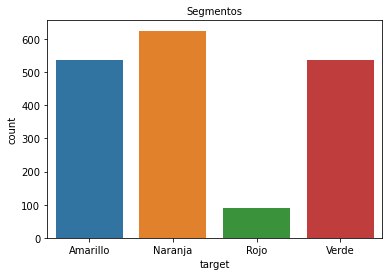

In [117]:
# Segmentos
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Segmentos', fontsize = 'medium')
sns.countplot(data = dataset, x='target')
print(dataset.target.value_counts().sort_index())

In [123]:
dataset['SScore5'] = dataset['SScore'] * 0.05

In [125]:
dataset["Ei_segment"] = np.where(dataset['SScore5'] > 4.5, "Muy Alto",
                                           (np.where(
                                               dataset['SScore5'] > 4,
                                               "Alto",
                                               (np.where(
                                                   dataset['SScore5'] > 3,
                                                   "Medio",
                                                   np.where(dataset['SScore5'] > 1.6,
                                                            'Bajo', 'Muy Bajo'))))))



Alto         19
Bajo        945
Medio       547
Muy Bajo    276
Name: Ei_segment, dtype: int64


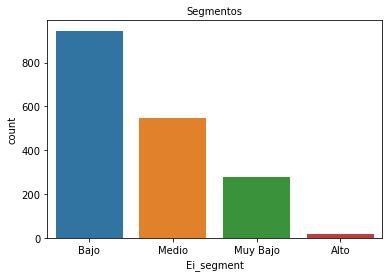

In [129]:
# Segmentos
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Segmentos', fontsize = 'medium')
sns.countplot(data = dataset, x='Ei_segment')
print(dataset.Ei_segment.value_counts().sort_index())

### Guarda resultado y carga a la base

In [130]:
dataset.to_csv('eis_fraude.csv')

In [132]:
df_base = pd.read_csv("eis_fraude.csv")
df_base.rename(columns={'Unnamed: 0': 'Column_0'}, inplace=True)

In [133]:
df_base.shape

(1787, 53)

In [134]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()
cursor.execute("truncate table staging.xls.eis_fraude")

for index, row in df_base.iterrows():
     cursor.execute("INSERT INTO staging.xls.eis_fraude (Column_0, fecha_proceso, id_distribuidor, des_sexo, num_identificacion, des_estado_civil, des_almacen, cod_estado,fecha_ingreso, fecha_baja, edad_anios, vigencia_meses,level_1, fecha_ult_solicitud, fecha_ult_consumo, tiempo_ult_solicitud, tiempo_ult_consumo, cantidad_clientes, cantidad_clientes_estafador, solicitudes_ingresadas,solicitudes_califica, solicitudes_aprobadas, solicitudes_negadas,solicitudes_negadas_inconsistencia, cantidad_clientes_consumo, cantidad_clientes_bloqueado, cantidad_clientes_bloqueado_cobranza, cantidad_clientes_cuota_uno_impaga,cantidad_clientes_gestion_negativa, plazo_promedio, monto_credito, monto_corriente, monto_vencido, monto_vencer,monto_transcurrido, tasa_califica, tasa_aprobacion, tasa_estafador, tasa_gestion_negativa, tasa_cuota_uno_impaga,tasa_negacion, tasa_negacion_inconsistencia, tasa_bloqueado_credito, tasa_bloqueado_cobranzas, tasa_consumo, tasa_vencimiento, comision_propia, comision_nivel, bonos, SScore, target, SScore5, Ei_segment) values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", row.Column_0, row.fecha_proceso, row.id_distribuidor, row.des_sexo, row.num_identificacion, row.des_estado_civil, row.des_almacen, row.cod_estado, row.fecha_ingreso, row.fecha_baja, row.edad_anios, row.vigencia_meses, row.level_1, row.fecha_ult_solicitud, row.fecha_ult_consumo, row.tiempo_ult_solicitud, row.tiempo_ult_consumo, row.cantidad_clientes, row.cantidad_clientes_estafador, row.solicitudes_ingresadas,row.solicitudes_califica, row.solicitudes_aprobadas, row.solicitudes_negadas,row.solicitudes_negadas_inconsistencia, row.cantidad_clientes_consumo, row.cantidad_clientes_bloqueado, row.cantidad_clientes_bloqueado_cobranza, row.cantidad_clientes_cuota_uno_impaga,row.cantidad_clientes_gestion_negativa, row.plazo_promedio, row.monto_credito, row.monto_corriente, row.monto_vencido, row.monto_vencer,row.monto_transcurrido, row.tasa_califica, row.tasa_aprobacion, row.tasa_estafador, row.tasa_gestion_negativa, row.tasa_cuota_uno_impaga,row.tasa_negacion, row.tasa_negacion_inconsistencia, row.tasa_bloqueado_credito, row.tasa_bloqueado_cobranzas, row.tasa_consumo, row.tasa_vencimiento, row.comision_propia, row.comision_nivel, row.bonos, row.SScore, row.target, row.SScore5, row.Ei_segment)

conn.commit()
cursor.close()